# notebook used make team clusters
teams are clustered by their number of wins

## imports

In [1]:
import matplotlib.pyplot as plt
from lib import read_data
from sklearn.cluster import KMeans
import numpy as np

## define plot generator function

In [2]:
def plot_wins(data, clusters):
    # Count the number of wins (1's) for each team/season entry
    win_counts = [sum(data[entry]) for entry in data]
    win_counts_np = np.array(win_counts).reshape(-1, 1)

    # Choose number of clusters (k) - you can adjust this as needed
    k = clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(win_counts_np)
    labels = kmeans.labels_
    centers = sorted([int(c[0]) for c in kmeans.cluster_centers_])

    # Plot cluster thresholds (y value boundaries)
    thresholds = []
    for i in range(len(centers) - 1):
        thresholds.append((centers[i] + centers[i+1]) / 2)

    # Plot the win counts and cluster thresholds
    plt.figure(figsize=(10, 4))
    x_vals = range(len(win_counts))
    plt.scatter(x_vals, win_counts, c=labels, cmap='viridis', label='Teams')
    for t in thresholds:
        plt.axhline(y=t, color='red', linestyle='--', label=f'Threshold: {t:.1f}')
    plt.xlabel('Team/Season Entry Index')
    plt.ylabel('Number of Wins')
    plt.title('Wins per Team/Season Entry with KMeans Clusters')
    plt.legend()
    plt.show()

    return thresholds

## view results

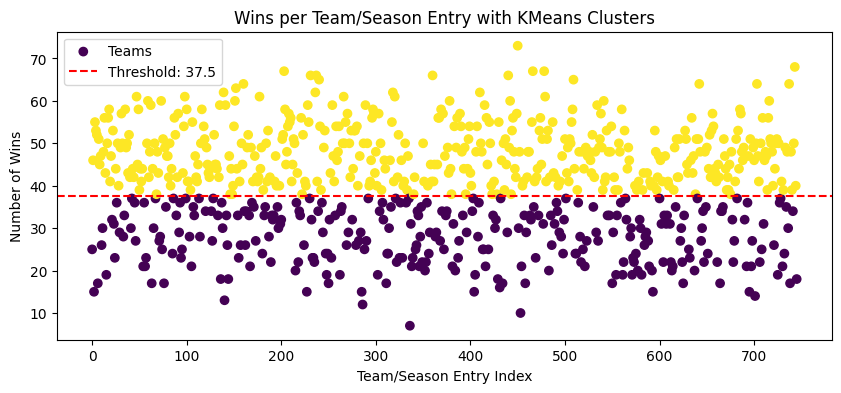

clusters: 2 -  [37.5]


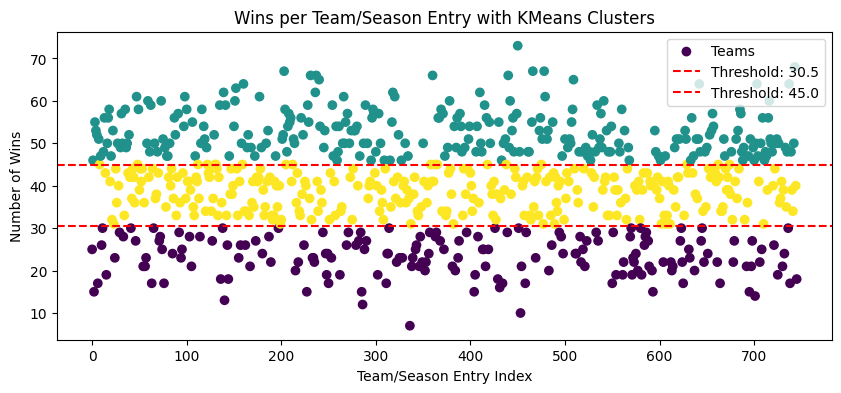

clusters: 3 -  [30.5, 45.0]


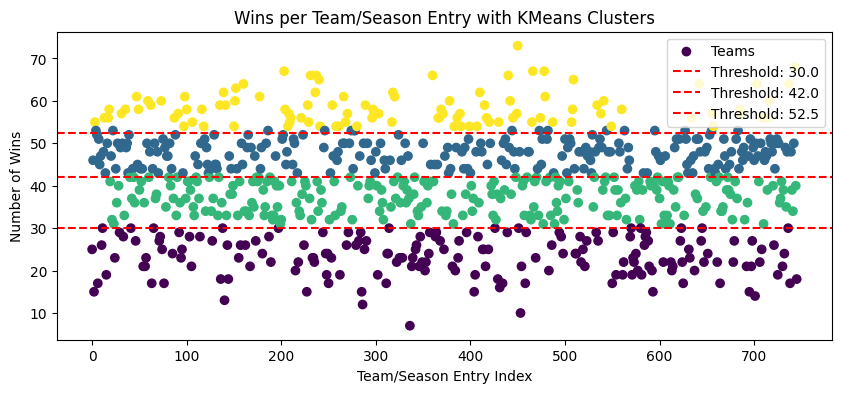

clusters: 4 -  [30.0, 42.0, 52.5]


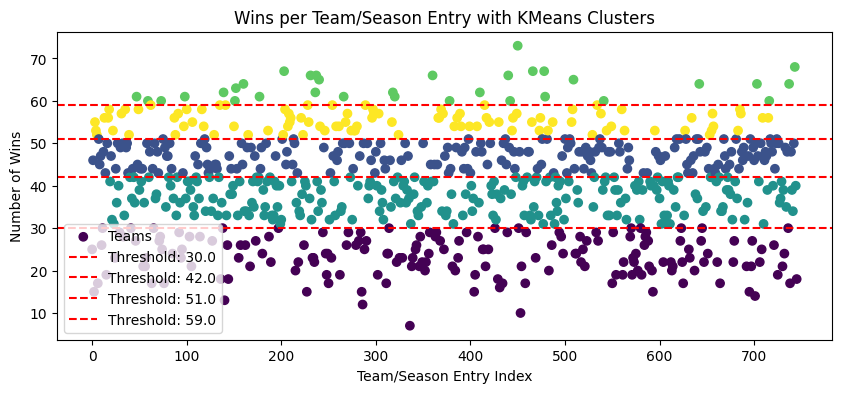

clusters: 5 -  [30.0, 42.0, 51.0, 59.0]


In [3]:
real_raw_data = read_data("../data/allseasons.csv")
for clusters in range(2, 6):
    cluster_bounds = plot_wins(real_raw_data, clusters)
    print(f"clusters: {clusters} - ", cluster_bounds)